In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
X_train.shape

(60000, 28, 28)

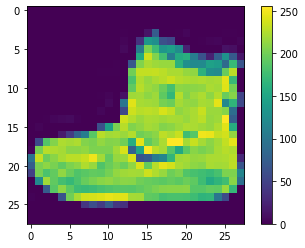

In [16]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

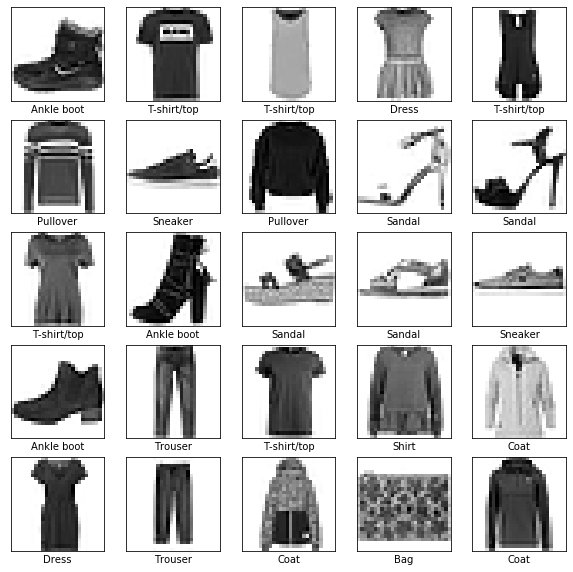

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [32]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4935 - accuracy: 0.8270
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3716 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3361 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3127 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2931 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2784 - accuracy: 0.8978
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2686 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2569 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2475 - accuracy: 0.9082
Epoch 10/1

In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.3436 - accuracy: 0.8777


In [36]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(X_test)

In [39]:
predictions[0]

array([2.9723685e-07, 1.2882843e-10, 1.0704921e-08, 1.1975458e-08,
       1.7613631e-10, 2.0117777e-04, 1.1198158e-06, 2.6147531e-03,
       8.3077488e-08, 9.9718261e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [43]:
y_test[0]

9

In [49]:
def plot_image(index, predictions, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions),
                                        class_names[true_label]),
              color= color)
    

In [52]:
def plot_value_array(index, predictions, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

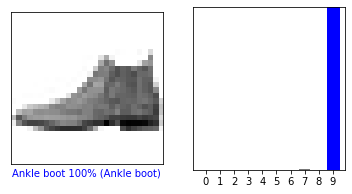

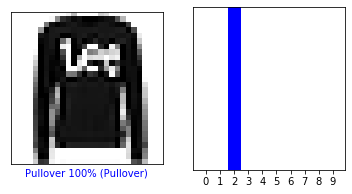

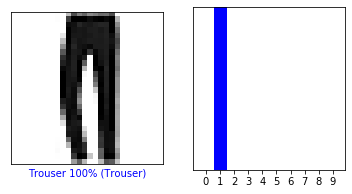

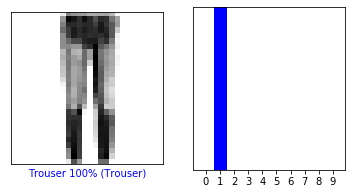

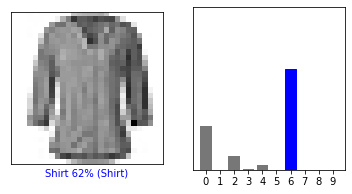

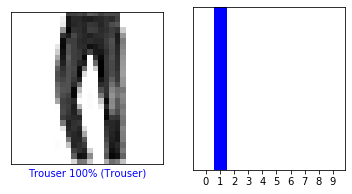

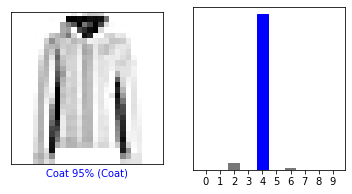

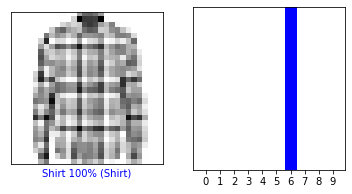

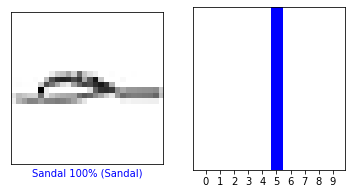

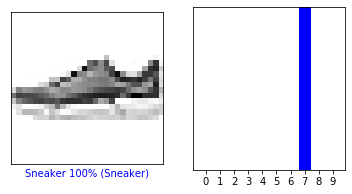

In [58]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], y_test)
    